<a href="https://colab.research.google.com/github/chamalj1980/ML_Fundementals/blob/main/capstone%20project/bank_marketing_classification_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Bank marketing - https://archive.ics.uci.edu/ml/datasets/Bank+Marketing

The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).

1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
 related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
file_name = '/content/drive/MyDrive/ML Datasets/bank-full.csv'

data = pd.read_csv(file_name,sep=';')
data.head()
data.head().transpose()

,0,1,2,3,4
age,58,44,33,47,33
job,management,technician,entrepreneur,blue-collar,unknown
marital,married,single,married,married,single
education,tertiary,secondary,secondary,unknown,unknown
default,no,no,no,no,no
balance,2143,29,2,1506,1
housing,yes,yes,yes,yes,no
loan,no,no,yes,no,no
contact,unknown,unknown,unknown,unknown,unknown
day,5,5,5,5,5


In [ ]:
data.shape

(45211, 17)

In [ ]:
data.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,45211,NaN,NaN,NaN,40.9362,10.6188,18,33,39,48,95
job,45211,12,blue-collar,9732,NaN,NaN,NaN,NaN,NaN,NaN,NaN
marital,45211,3,married,27214,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education,45211,4,secondary,23202,NaN,NaN,NaN,NaN,NaN,NaN,NaN
default,45211,2,no,44396,NaN,NaN,NaN,NaN,NaN,NaN,NaN
balance,45211,NaN,NaN,NaN,1362.27,3044.77,-8019,72,448,1428,102127
housing,45211,2,yes,25130,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loan,45211,2,no,37967,NaN,NaN,NaN,NaN,NaN,NaN,NaN
contact,45211,3,cellular,29285,NaN,NaN,NaN,NaN,NaN,NaN,NaN
day,45211,NaN,NaN,NaN,15.8064,8.32248,1,8,16,21,31


In [ ]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [ ]:
data.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [ ]:
data.loc[data['job' ].isna()]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y


In [ ]:
data.shape

(45211, 17)

In [ ]:
data.dropna(how='any', axis=0, inplace=True)
data.shape

(45211, 17)

### Creating a unique ID

In [ ]:
data.index

Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,
                9,
            ...
            45201, 45202, 45203, 45204, 45205, 45206, 45207, 45208, 45209,
            45210],
           dtype='int64', length=45211)

In [ ]:
data['ID'] = data.index + 1
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y', 'ID'],
      dtype='object')

In [ ]:
data = data[['ID','age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y']] 

In [ ]:
data.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,1,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,2,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,3,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,4,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,5,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


## Descriptive statistics

In [ ]:
data['age'].describe()

count    45211.000000
mean        40.936210
std         10.618762
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         95.000000
Name: age, dtype: float64

In [ ]:
data['balance'].describe()

count     45211.000000
mean       1362.272058
std        3044.765829
min       -8019.000000
25%          72.000000
50%         448.000000
75%        1428.000000
max      102127.000000
Name: balance, dtype: float64

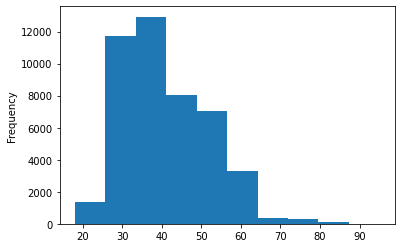

In [ ]:
data['age'].plot(kind='hist', bins=10)

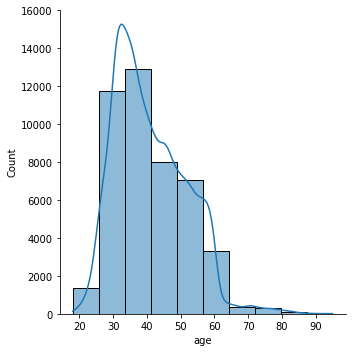

In [ ]:
sns.displot(kind='hist', x='age', data=data, bins=10, kde=True)

In [ ]:
data['scaled_age'] = data['age']/data['age'].max()
data['scaled_age']

0        0.610526
1        0.463158
2        0.347368
3        0.494737
4        0.347368
           ...   
45206    0.536842
45207    0.747368
45208    0.757895
45209    0.600000
45210    0.389474
Name: scaled_age, Length: 45211, dtype: float64

In [ ]:
data['balance'].describe()

count     45211.000000
mean       1362.272058
std        3044.765829
min       -8019.000000
25%          72.000000
50%         448.000000
75%        1428.000000
max      102127.000000
Name: balance, dtype: float64

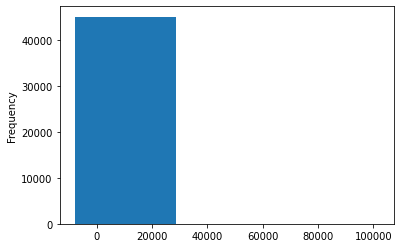

In [ ]:
data['balance'].plot(kind='hist', bins=3)

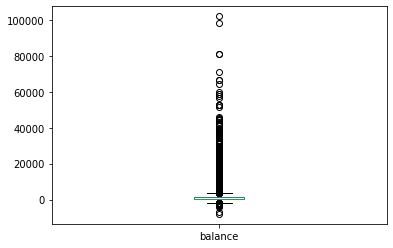

In [ ]:
data['balance'].plot(kind='box')

In [ ]:
data['campaign'].unique()

array([ 1,  2,  3,  5,  4,  6,  7,  8,  9, 10, 11, 12, 13, 19, 14, 24, 16,
       32, 18, 22, 15, 17, 25, 21, 43, 51, 63, 41, 26, 28, 55, 50, 38, 23,
       20, 29, 31, 37, 30, 46, 27, 58, 33, 35, 34, 36, 39, 44])

In [ ]:
data['campaign'].describe()

count    45211.000000
mean         2.763841
std          3.098021
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         63.000000
Name: campaign, dtype: float64

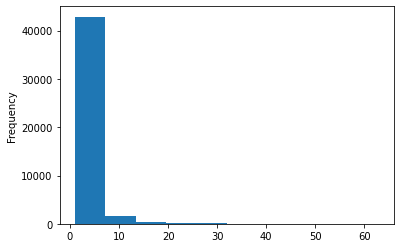

In [ ]:
data['campaign'].plot(kind='hist', bins=10)

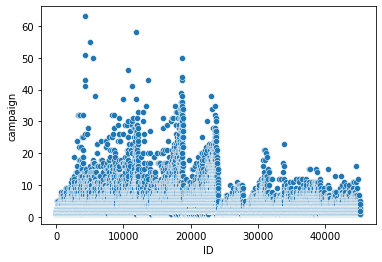

In [ ]:
sns.scatterplot(x=data['ID'], y=data['campaign'])

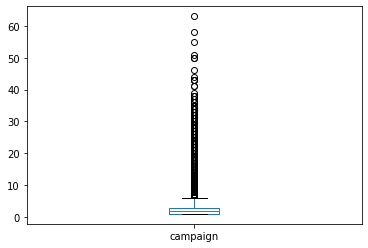

In [ ]:
data['campaign'].plot(kind='box')

In [ ]:
data['campaign'].value_counts()

1     17544
2     12505
3      5521
4      3522
5      1764
6      1291
7       735
8       540
9       327
10      266
11      201
12      155
13      133
14       93
15       84
16       79
17       69
18       51
19       44
20       43
21       35
22       23
23       22
25       22
24       20
28       16
29       16
26       13
31       12
27       10
32        9
30        8
33        6
34        5
36        4
35        4
43        3
38        3
41        2
50        2
37        2
51        1
55        1
46        1
58        1
44        1
39        1
63        1
Name: campaign, dtype: int64

In [ ]:
 data['pdays'].describe()

count    45211.000000
mean        40.197828
std        100.128746
min         -1.000000
25%         -1.000000
50%         -1.000000
75%         -1.000000
max        871.000000
Name: pdays, dtype: float64

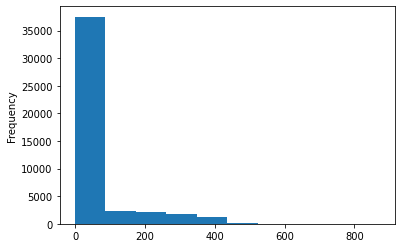

In [ ]:
data['pdays'].plot(kind='hist', bins=10)

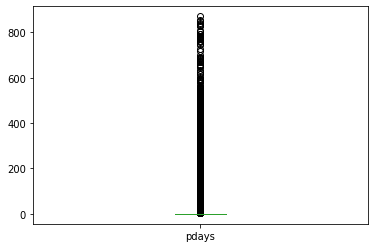

In [ ]:
data['pdays'].plot(kind='box')

### Exploring categorical variables

In [ ]:
data['job'].head()


0      management
1      technician
2    entrepreneur
3     blue-collar
4         unknown
Name: job, dtype: object

In [ ]:
data['job'].unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin.', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

In [ ]:
data['job'].value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

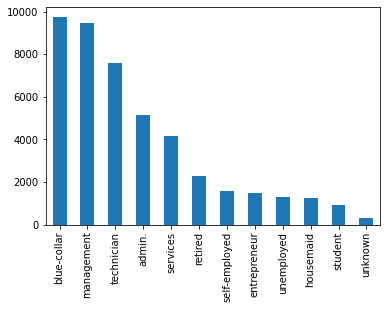

In [ ]:
data['job'].value_counts().plot(kind='bar')

In [ ]:
data['job'].loc[data['job']=='unknown']


4        unknown
216      unknown
354      unknown
876      unknown
1072     unknown
          ...   
44714    unknown
44742    unknown
44970    unknown
45141    unknown
45186    unknown
Name: job, Length: 288, dtype: object

In [ ]:
data.groupby(by='job')['ID'].count()

job
admin.           5171
blue-collar      9732
entrepreneur     1487
housemaid        1240
management       9458
retired          2264
self-employed    1579
services         4154
student           938
technician       7597
unemployed       1303
unknown           288
Name: ID, dtype: int64

In [ ]:
data.groupby(by='job')['age'].min()

job
admin.           20
blue-collar      20
entrepreneur     21
housemaid        22
management       21
retired          24
self-employed    22
services         20
student          18
technician       21
unemployed       21
unknown          25
Name: age, dtype: int64

In [ ]:
data['education'].unique()

array(['tertiary', 'secondary', 'unknown', 'primary'], dtype=object)

In [ ]:
data['education'].value_counts()

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

In [ ]:
data['marital'].unique()

array(['married', 'single', 'divorced'], dtype=object)

In [ ]:
data['default'].unique()

array(['no', 'yes'], dtype=object)

In [ ]:
data['housing'].unique()

array(['yes', 'no'], dtype=object)

In [ ]:
data['loan'].unique()

array(['no', 'yes'], dtype=object)

In [ ]:
data['poutcome'].unique()

array(['unknown', 'failure', 'other', 'success'], dtype=object)

In [ ]:
data['poutcome'].value_counts('normalise')

unknown    0.817478
failure    0.108403
other      0.040698
success    0.033421
Name: poutcome, dtype: float64

poutcome has insufficient data to be considered for the ML model. 81.75% ofthe data are "unknown"

## Data Pre-processing Function

In [ ]:
def pre_processing(data):    
    data['id'] = data.index+1

    
    # Select Columns
    X_variables = []
    
        
    return data[X_variables]

## Train Test Split

# Model Training Function

In [ ]:
def model_train(model, model_name, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    y_pred_prob = model.predict_proba(X_test)[:, 1]
    test_result = pd.DataFrame(data={'y_act':y_test, 'y_pred':y_pred, 'y_pred_prob':y_pred_prob})

    accuracy = metrics.accuracy_score(test_result['y_act'], test_result['y_pred']) 
    precision = metrics.precision_score(test_result['y_act'], test_result['y_pred'], average='binary', pos_label=1)
    f1_score = metrics.f1_score(test_result['y_act'], test_result['y_pred'], average='weighted')  #weighted accounts for label imbalance.
    roc_auc = metrics.roc_auc_score(test_result['y_act'], test_result['y_pred_prob'])

    return ({'model_name':model_name, 
                   'model':model, 
                   'accuracy':accuracy, 
                   'precision':precision,
                  'f1_score':f1_score,
                  'roc_auc':roc_auc,
                  })

# Fitting Multipe Models with Different Hyperparamaters

(A) Manually explore hyper parameter space

In [ ]:
models = []
models.append(model_train(LogisticRegression(n_jobs=3, verbose=1), 'lgr1', X_train, y_train, X_test, y_test))
models.append(model_train(RandomForestClassifier(n_estimators=100, max_depth=None, n_jobs=3, verbose=1), 'rf1', X_train, y_train, X_test, y_test))
models.append(model_train(RandomForestClassifier(n_estimators=500, max_depth=None, n_jobs=3, verbose=1), 'rf2', X_train, y_train, X_test, y_test))
models.append(model_train(RandomForestClassifier(n_estimators=500, max_depth=10, n_jobs=3, verbose=1), 'rf3', X_train, y_train, X_test, y_test))
models.append(model_train(RandomForestClassifier(n_estimators=500, max_depth=20, n_jobs=3, verbose=1), 'rf4', X_train, y_train, X_test, y_test))
models = pd.DataFrame(models)
models

## (B) Use of grid search

In [ ]:
from sklearn.model_selection import GridSearchCV

parameters = {'n_estimators': [100,500], 'max_depth': [None, 10, 20]}
gs_model = GridSearchCV(RandomForestClassifier(), parameters, n_jobs=2, verbose=3, pre_dispatch=2)
gs_model.fit(X_train, y_train)          

# Select the best model

In [ ]:
# Select best model 
model = models.query("model_name=='rf3'")
model

# Saving the best model

## Use Pickle

In [ ]:
import pickle

save_file = 'model_rf3_test.pickle'
pickle.dump(model, open(save_file, 'wb'))

In [ ]:
# loading from file
model_ = pickle.load(open(save_file, 'rb'))
model_

## Use Joblib

In [ ]:
import joblib

save_file = 'model_rf3_test.joblib'
joblib.dump(model, open(save_file, 'wb'))

In [ ]:
# loading from file
model_ = joblib.load(save_file)
model_

# Predict on a Sample Data

## Score function

In [ ]:
def score(input_data, model):
    return model.predict_proba(input_data)

In [ ]:
prediction = score(input_data=pre_processing(sample_input), model=model)
prediction

# Post-processing Function for Prediction

In [ ]:
def post_processing(prediction):
    if len(prediction)==1:
        return prediction[:, 1][0]
    else:
        return prediction[:, 1]

In [ ]:
output = post_processing(score(input_data=pre_processing(sample_input), model=model))
output

In [ ]:
# Create new column in input dataset
sample_input['prediction'] = post_processing(model.predict_proba(pre_processing(sample_input)))
sample_input

In [ ]:
# Output value 
sample_output = post_processing(score(input_data=pre_processing(sample_input), model=model))
sample_output

## Prediction Function for Application (Inference Pipeline)

In [ ]:
def app_prediction_function(input_data, model):
    return post_processing(score(input_data=pre_processing(input_data), model=model))

In [ ]:
input_data = data[].sample(1)
print(input_data)
app_prediction_function(input_data, model)

# Formulating the ML problem

In [ ]:
data.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'y', 'scaled_age'],
      dtype='object')

In [ ]:
data['y'].unique()

array(['no', 'yes'], dtype=object)

## Transform into binary columns

In [ ]:
data['y_act'] = np.where(data['y']=='yes',1,0)

In [ ]:
data[['y','y_act']].sample(10)

,y,y_act
31394,yes,1
23364,no,0
35233,no,0
3027,no,0
10491,no,0
33958,no,0
12259,no,0
19841,no,0
14340,no,0
30198,no,0


In [ ]:
data['y_act'].value_counts()

0    39922
1     5289
Name: y_act, dtype: int64

## Converting categorical variables to numercal

In [ ]:
data['job'].unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin.', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

In [ ]:
# replace unknown with NaN

data['jobs'] = data['job'].replace('unknown', np.NaN)

In [ ]:

data['jobs'].sample(10)

16403    self-employed
22273      blue-collar
31249          retired
44808       technician
5505       blue-collar
26185     entrepreneur
32246     entrepreneur
11699      blue-collar
23793      blue-collar
5670        technician
Name: jobs, dtype: object

In [ ]:
data.dtypes

ID              int64
age             int64
job            object
marital        object
education      object
default        object
balance         int64
housing        object
loan           object
contact        object
day             int64
month          object
duration        int64
campaign        int64
pdays           int64
previous        int64
poutcome       object
y              object
scaled_age    float64
y_act           int64
jobs           object
dtype: object

Following coding scheme will be used

unemployed == 0
student == 1
housemaid == 2
blue-collar == 3
admin = 4
technician == 5
services== 5
self-employed = 5
retired == 6
management,entrepreneur = 7

In [ ]:
#Function that will return a value for the jub category

def job_category_converter(job):
  if job in ('unemployed'):
    return 0
  elif job in ('student'):
    return 1
  elif job in ('housemaid'):
    return 2
  elif job in ('blue-collar'):
    return 3
  elif job in ('admin.'):
    return 4
  elif job in ('technician', 'services','self-employed'):
    return 5
  elif job in ('retired'):
    return 6
  elif job in ('management','entrepreneur'):
    return 7

In [ ]:
data['job_category'] = data['job'].apply(job_category_converter)
data['job_category'] 

0        7.0
1        5.0
2        7.0
3        3.0
4        NaN
        ... 
45206    5.0
45207    6.0
45208    6.0
45209    3.0
45210    7.0
Name: job_category, Length: 45211, dtype: float64

In [ ]:
job_category_mean = round(data['job_category'].mean())
job_category_mean 

5

In [ ]:
data['job_category'] = data['job_category'].replace(np.NaN,job_category_mean)

In [ ]:
data['job_category'].unique()

array([7., 5., 3., 6., 4., 0., 2., 1.])

In [ ]:
data.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'y', 'scaled_age', 'y_act', 'jobs',
       'job_category'],
      dtype='object')

In [ ]:
data.head().transpose()

,0,1,2,3,4
ID,1,2,3,4,5
age,58,44,33,47,33
job,management,technician,entrepreneur,blue-collar,unknown
marital,married,single,married,married,single
education,tertiary,secondary,secondary,unknown,unknown
default,no,no,no,no,no
balance,2143,29,2,1506,1
housing,yes,yes,yes,yes,no
loan,no,no,yes,no,no
contact,unknown,unknown,unknown,unknown,unknown


In [ ]:
data['education'].value_counts()

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

## Converting education to a numerical values

Following rationale will be adopted

primary == 2
secondary == 4
tertiary == 6

For unknown mean will be taken and the unknown value will be replced


In [ ]:
#THis function will return a value for education category

def education_category_converter(education):
  if education in ('primary'):
    return 2
  elif education in ('secondary'):
    return 4
  elif education in ('tertiary'):
    return 6
  

In [ ]:
data['education_category'] = data['education'].apply(education_category_converter)
data['education_category']

0        6.0
1        4.0
2        4.0
3        NaN
4        NaN
        ... 
45206    6.0
45207    2.0
45208    4.0
45209    4.0
45210    4.0
Name: education_category, Length: 45211, dtype: float64

In [ ]:
# Replacing nulls with the mean

education_category_mean = round(data['education_category'].mean())
data['education_category'] = data['education_category'].replace(np.NaN,education_category_mean)

In [ ]:
data['education_category'].unique()

array([6., 4., 2.])

In [ ]:
data.shape

(45211, 23)

In [ ]:
data['default'].value_counts()

no     44396
yes      815
Name: default, dtype: int64

In [ ]:
data['default_numerical'] = np.where(data['default']=='no',1,0)
data[['default','default_numerical']].sample(10)

,default,default_numerical
42120,no,1
29315,no,1
26705,no,1
11991,no,1
71,no,1
35528,no,1
27509,no,1
3698,no,1
6412,no,1
22507,no,1


In [ ]:
data['housing'].value_counts()

yes    25130
no     20081
Name: housing, dtype: int64

In [ ]:
data['housing_numerical'] = np.where(data['housing']=='no',1,0)
data[['housing','housing_numerical']].sample(10)

,housing,housing_numerical
23441,no,1
11954,no,1
33047,yes,0
34459,yes,0
20023,no,1
31906,yes,0
4429,yes,0
3678,yes,0
44121,no,1
1962,yes,0


In [ ]:
data['loan'].value_counts()

no     37967
yes     7244
Name: loan, dtype: int64

In [ ]:
data['loan_numerical'] = np.where(data['loan']=='no',1,0)
data[['loan','loan_numerical']].sample(10)

,loan,loan_numerical
35144,no,1
9847,no,1
9515,no,1
10242,no,1
39014,no,1
29749,yes,0
8668,no,1
6319,yes,0
34501,no,1
43878,no,1


In [ ]:
data['marital'].value_counts()

married     27214
single      12790
divorced     5207
Name: marital, dtype: int64

## One hot encoding

In [ ]:
data = pd.get_dummies(data,columns=['default'], prefix='default')
data = pd.get_dummies(data,columns=['housing'], prefix='housing')
data = pd.get_dummies(data,columns=['loan'], prefix='loan')

In [ ]:
data.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'balance', 'contact', 'day',
       'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'y',
       'scaled_age', 'y_act', 'jobs', 'job_category', 'education_category',
       'default_numerical', 'housing_numerical', 'loan_numerical',
       'default_no', 'default_yes', 'housing_no', 'housing_yes', 'loan_no',
       'loan_yes'],
      dtype='object')

In [ ]:
data[['default_no','default_yes']]

,default_no,default_yes
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
45206,1,0
45207,1,0
45208,1,0
45209,1,0


## Correlation

In [ ]:
correlation_matrix = data[['age','job_category','education_category', 'default_no', 'default_yes', 'housing_no', 'housing_yes','loan_no', 'loan_yes', 'y_act']].corr()
correlation_matrix


,age,job_category,education_category,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,y_act
age,1.000000,0.117433,-0.164888,0.017879,-0.017879,0.185513,-0.185513,0.015655,-0.015655,0.025155
job_category,0.117433,1.000000,0.474564,-0.001937,0.001937,0.063701,-0.063701,-0.014757,0.014757,0.022983
education_category,-0.164888,0.474564,1.000000,0.011539,-0.011539,0.075157,-0.075157,0.025282,-0.025282,0.068633
default_no,0.017879,-0.001937,0.011539,1.000000,-1.000000,-0.006025,0.006025,0.077234,-0.077234,0.022419
default_yes,-0.017879,0.001937,-0.011539,-1.000000,1.000000,0.006025,-0.006025,-0.077234,0.077234,-0.022419
housing_no,0.185513,0.063701,0.075157,-0.006025,0.006025,1.000000,-1.000000,0.041323,-0.041323,0.139173
housing_yes,-0.185513,-0.063701,-0.075157,0.006025,-0.006025,-1.000000,1.000000,-0.041323,0.041323,-0.139173
loan_no,0.015655,-0.014757,0.025282,0.077234,-0.077234,0.041323,-0.041323,1.000000,-1.000000,0.068185
loan_yes,-0.015655,0.014757,-0.025282,-0.077234,0.077234,-0.041323,0.041323,-1.000000,1.000000,-0.068185
y_act,0.025155,0.022983,0.068633,0.022419,-0.022419,0.139173,-0.139173,0.068185,-0.068185,1.000000


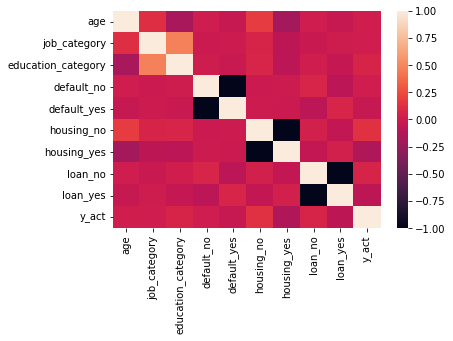

In [ ]:
sns.heatmap(correlation_matrix)

# Model Building

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

## Identify `X` and `y`

In [ ]:
data.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'balance', 'contact', 'day',
       'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'y',
       'scaled_age', 'y_act', 'jobs', 'job_category', 'education_category',
       'default_numerical', 'housing_numerical', 'loan_numerical',
       'default_no', 'default_yes', 'housing_no', 'housing_yes', 'loan_no',
       'loan_yes'],
      dtype='object')

In [ ]:
X_variables = ['scaled_age', 'job_category', 'education_category','default_no', 'default_yes', 'housing_no', 'housing_yes','loan_no', 'loan_yes']
data[X_variables].head()

,scaled_age,job_category,education_category,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes
0,0.610526,7.0,6.0,1,0,0,1,1,0
1,0.463158,5.0,4.0,1,0,0,1,1,0
2,0.347368,7.0,4.0,1,0,0,1,0,1
3,0.494737,3.0,4.0,1,0,0,1,1,0
4,0.347368,5.0,4.0,1,0,1,0,1,0


In [ ]:
y_varibale = 'y_act'
data[y_varibale].head()

0    0
1    0
2    0
3    0
4    0
Name: y_act, dtype: int64

In [ ]:
data[y_varibale].unique()

array([0, 1])

In [ ]:
X = data[X_variables].values
X

array([[0.61052632, 7.        , 6.        , ..., 1.        , 1.        ,
        0.        ],
       [0.46315789, 5.        , 4.        , ..., 1.        , 1.        ,
        0.        ],
       [0.34736842, 7.        , 4.        , ..., 1.        , 0.        ,
        1.        ],
       ...,
       [0.75789474, 6.        , 4.        , ..., 0.        , 1.        ,
        0.        ],
       [0.6       , 3.        , 4.        , ..., 0.        , 1.        ,
        0.        ],
       [0.38947368, 7.        , 4.        , ..., 0.        , 1.        ,
        0.        ]])

In [ ]:
y = data[y_varibale].values
y

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

## Train Test Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(F"Train sample size = {len(X_train)}")
print(F"Test sample size  = {len(X_test)}")

Train sample size = 31647
Test sample size  = 13564


## Create Logistic Regession Model 

In [ ]:
#from sklearn.ensemble import RandomForestClassifier

In [ ]:
model = RandomForestClassifier(n_estimators=10000)
#model = LogisticRegression()

## Fit Model

In [ ]:
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

## Predict

In [ ]:
model.predict_proba(X_test)

array([[0.95107251, 0.04892749],
       [0.91043145, 0.08956855],
       [0.8566709 , 0.1433291 ],
       ...,
       [0.86700611, 0.13299389],
       [0.99294996, 0.00705004],
       [0.84889444, 0.15110556]])

## Predicted Probability for Class 1

In [ ]:
y_pred_prob = model.predict_proba(X_test)[:, 1]
y_pred_prob

array([0.04892749, 0.08956855, 0.1433291 , ..., 0.13299389, 0.00705004,
       0.15110556])

In [ ]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

## Create Results Data Frame for Test Sample

In [ ]:
test_result = pd.DataFrame(data={'y_act':y_test, 'y_pred':y_pred, 'y_pred_prob':y_pred_prob})
test_result.sample(100)

,y_act,y_pred,y_pred_prob
6283,1,0,0.270879
6671,0,0,0.131964
770,0,0,0.174093
13342,0,0,0.112149
11728,0,0,0.174093
...,...,...,...
3481,0,0,0.094696
10432,0,0,0.045248
4015,0,0,0.030465
5509,0,0,0.274437


## Confusion Matrix

In [ ]:
cm = pd.crosstab(test_result['y_act'], test_result['y_pred'], margins=True)
cm

y_pred,0,1,All
y_act,,,
0,11793,173,11966
1,1518,80,1598
All,13311,253,13564


In [ ]:
acuracy = (cm.loc[0,0] + cm.loc[1,1] ) / cm.loc['All','All'] 
acuracy

0.8753317605426127